In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/retailvisits/RelianceRetailVisits.csv")

# Display the first few rows of the dataset
df.head()


,Customer Index,Age Group,Visit Status,Visit Frequency,Other Reliance Stores
0,1.0,26 To 35 years,Already Visited,Once a Month,Yes
1,2.0,26 To 35 years,First visit,Not Visited Before,Yes
2,3.0,16 To 25 years,Already Visited,Once a Month,Yes
3,4.0,26 To 35 years,First visit,Not Visited Before,No
4,5.0,16 To 25 years,First visit,Not Visited Before,No


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the count of missing values for each column
missing_values


Customer Index           2
Age Group                2
Visit Status             2
Visit Frequency          2
Other Reliance Stores    2
dtype: int64

In [4]:
df.describe()

,Customer Index
count,99.000000
mean,50.000000
std,28.722813
min,1.000000
25%,25.500000
50%,50.000000
75%,74.500000
max,99.000000


**Explore Categorical Variables**

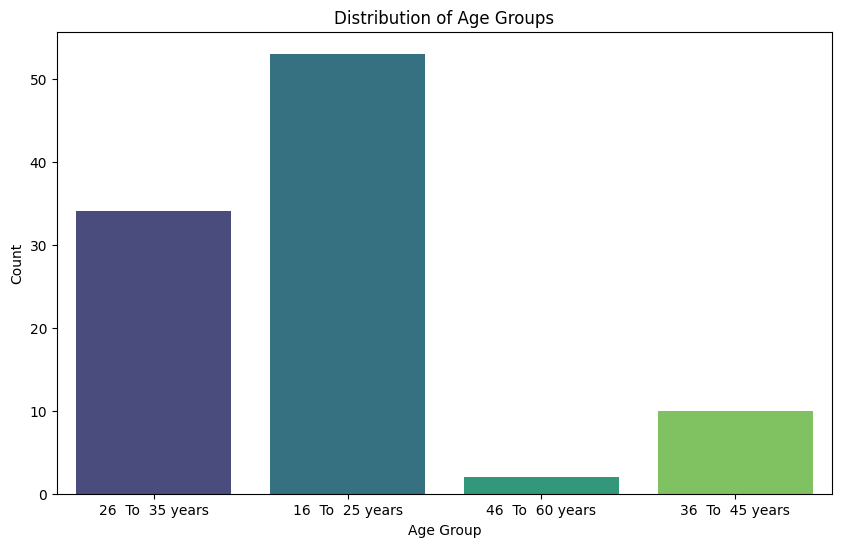

In [5]:
# Countplot for 'Age Group'
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, palette='viridis')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


**Visualize Visit Status**

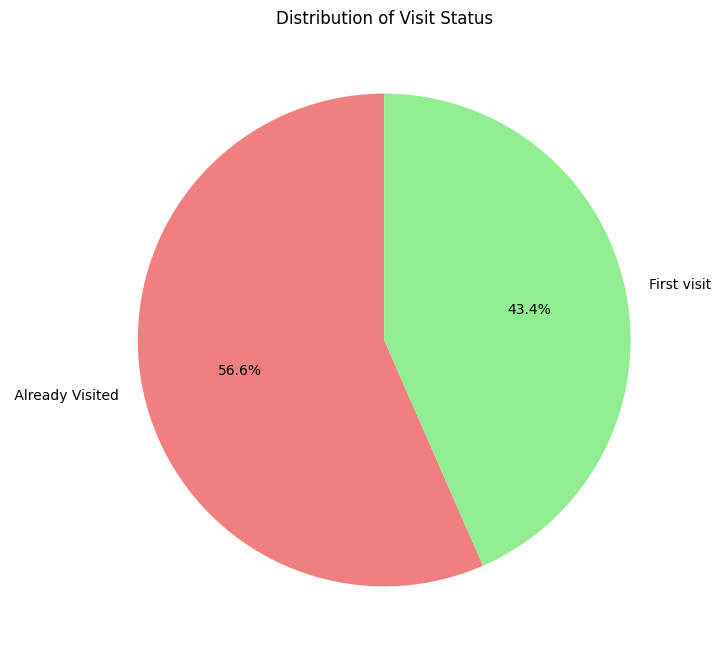

In [6]:
# Pie chart for 'Visit Status'
visit_status_counts = df['Visit Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(visit_status_counts, labels=visit_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Visit Status')
plt.show()


**Analyze Visit Frequency**

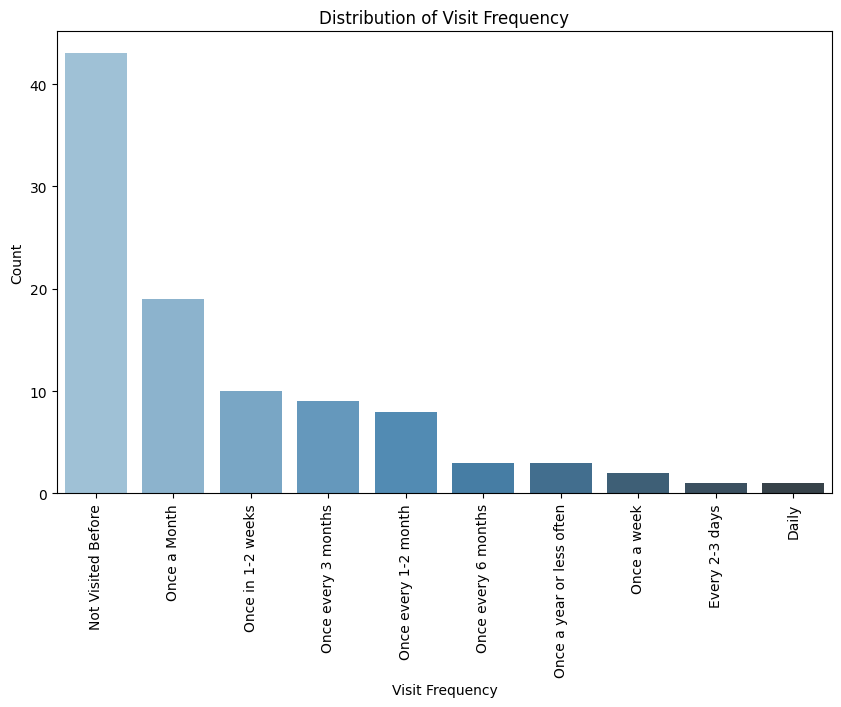

In [7]:
# Bar chart for 'Visit Frequency'
visit_frequency_counts = df['Visit Frequency'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=visit_frequency_counts.index, y=visit_frequency_counts.values, palette='Blues_d')
plt.title('Distribution of Visit Frequency')
plt.xlabel('Visit Frequency')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()


**Explore Relationship with Other Reliance Stores**

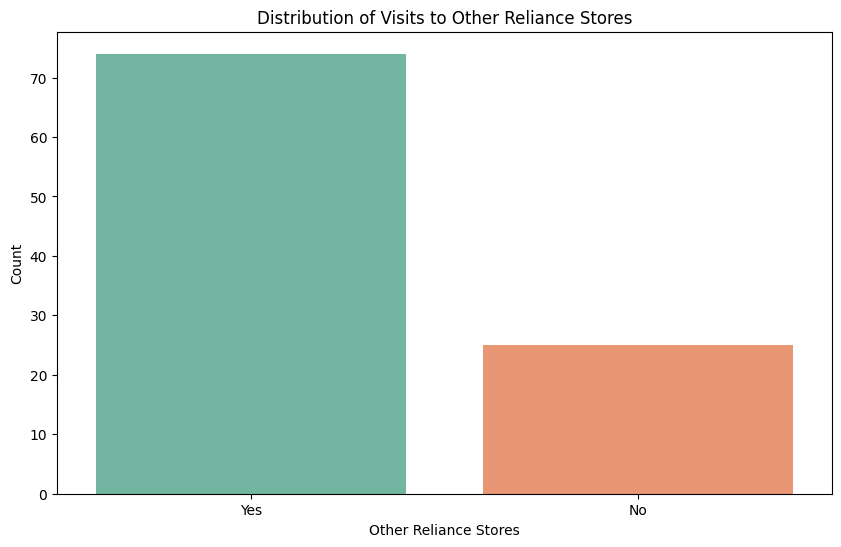

In [8]:
# Countplot for 'Other Reliance Stores'
plt.figure(figsize=(10, 6))
sns.countplot(x='Other Reliance Stores', data=df, palette='Set2')
plt.title('Distribution of Visits to Other Reliance Stores')
plt.xlabel('Other Reliance Stores')
plt.ylabel('Count')
plt.show()


**Plot Age Group Distribution**

In [9]:
# Pie chart for 'Age Group' using Plotly
age_group_counts = df['Age Group'].value_counts()
fig = px.pie(age_group_counts, labels=age_group_counts.index, values=age_group_counts.values, title='Distribution of Age Groups')
fig.show()


**nalyze Relationship with Other Reliance Stores**

In [10]:
# Donut chart for 'Other Reliance Stores' using Plotly
other_reliance_counts = df['Other Reliance Stores'].value_counts()
fig = px.pie(other_reliance_counts, names=other_reliance_counts.index, values=other_reliance_counts.values, hole=0.3, title='Distribution of Visits to Other Reliance Stores')
fig.show()


**What is the relationship between visit status and visit frequency, and how can it be depicted using a scatter plot**

In [11]:
# Scatter plot for 'Visit Status' and 'Visit Frequency' using Plotly
fig = px.scatter(df, x='Visit Frequency', y='Visit Status', color='Visit Status', title='Relationship between Visit Status and Visit Frequency')
fig.show()


**How does the visit frequency vary across different age groups, and what type of Plotly chart can effectively represent this variation?**

In [12]:
# Box plot for 'Visit Frequency' across 'Age Group' using Plotly
fig = px.box(df, x='Age Group', y='Visit Frequency', title='Variation of Visit Frequency Across Age Groups')
fig.show()


**How can the distribution of visit frequencies be visualized across different age groups using a violin plot**

In [13]:
# Violin plot for 'Visit Frequency' across 'Age Group' using Plotly
fig = px.violin(df, x='Age Group', y='Visit Frequency', title='Distribution of Visit Frequency Across Age Groups')
fig.show()


**What insights can be derived from a 3D scatter plot depicting the relationship between age groups, visit frequencies, and visit statuses**

In [14]:
# 3D Scatter plot for 'Age Group', 'Visit Frequency', and 'Visit Status' using Plotly
fig = px.scatter_3d(df, x='Age Group', y='Visit Frequency', z='Visit Status', color='Visit Status', title='3D Scatter Plot of Age Group, Visit Frequency, and Visit Status')
fig.show()


**How can a radar chart effectively represent the overall visit patterns, considering age group, visit status, and visit frequency?**

In [15]:
# Radar chart for overall visit patterns using Plotly
fig = px.line_polar(df, r='Visit Frequency', theta='Age Group', line_close=True, color='Visit Status', title='Radar Chart of Overall Visit Patterns')
fig.show()


**How can the distribution of customer visits to other Reliance stores be visually represented using a Pie chart**

In [16]:
# Pie chart for 'Other Reliance Stores' using Plotly
other_reliance_counts = df['Other Reliance Stores'].value_counts()
fig = px.pie(other_reliance_counts, names=other_reliance_counts.index, values=other_reliance_counts.values, title='Distribution of Visits to Other Reliance Stores')
fig.show()


**What is the correlation between age groups and visit frequencies, and how can it be visualized using a heatmap**

In [17]:
# Heatmap for correlation between 'Age Group' and 'Visit Frequency' using Plotly
correlation_matrix = df.groupby(['Age Group', 'Visit Frequency']).size().unstack().fillna(0)
fig = px.imshow(correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.index, color_continuous_scale='Viridis', title='Correlation Heatmap between Age Groups and Visit Frequencies')
fig.show()


**How does the visit status vary across different age groups, and what type of Plotly chart is suitable for illustrating this variation?**

In [18]:
# Bar chart for 'Visit Status' across 'Age Group' using Plotly
fig = px.bar(df, x='Age Group', y='Visit Status', color='Visit Status', title='Variation of Visit Status Across Age Groups')
fig.show()


**Can you create an animated scatter plot to visualize changes in visit frequencies and statuses over time**

In [19]:
# Animated scatter plot for 'Visit Frequency' and 'Visit Status' over time using Plotly
fig = px.scatter(df, x='Customer Index', y='Visit Frequency', animation_frame='Visit Status', color='Visit Status', title='Animated Scatter Plot of Visit Frequency and Status Over Time')
fig.show()


**Can you create a radar chart to showcase the distribution of visit frequencies across different age groups**

In [20]:
# Radar chart for distribution of visit frequencies across 'Age Group' using Plotly
fig = px.line_polar(df, r='Visit Frequency', theta='Age Group', line_close=True, title='Radar Chart of Visit Frequency Across Age Groups')
fig.show()


**How does the distribution of customer visits vary across different age groups and visit statuses, and what type of Plotly chart is suitable for visualizing this distribution?**

In [21]:
# Box plot for 'Visit Status' across 'Age Group' using Plotly
fig = px.box(df, x='Age Group', y='Visit Status', color='Age Group', title='Distribution of Customer Visits Across Age Groups and Visit Statuses')
fig.show()


**What insights can be derived from a radar chart depicting the relationship between age groups, visit frequencies, and the visit status**

In [22]:
# Radar chart for relationship between 'Age Group', 'Visit Frequency', and 'Visit Status' using Plotly
fig = px.line_polar(df, r='Visit Frequency', theta='Age Group', line_close=True, color='Visit Status', title='Radar Chart of Relationship Between Age Group, Visit Frequency, and Visit Status')
fig.show()


**How can the distribution of visit frequencies across age groups be visualized using a violin plot with Plotly, highlighting the visit statuses?**

In [23]:
# Violin plot for 'Visit Frequency' across 'Age Group' with hue for 'Visit Status' using Plotly
fig = px.violin(df, x='Age Group', y='Visit Frequency', color='Visit Status', title='Distribution of Visit Frequency Across Age Groups with Visit Status Highlighted')
fig.show()


**Can you create a bar chart to showcase the distribution of customer visits to other Reliance stores based on different age groups**

In [24]:
# Bar chart for 'Other Reliance Stores' across 'Age Group' using Plotly
fig = px.bar(df, x='Age Group', y='Other Reliance Stores', title='Distribution of Visits to Other Reliance Stores Across Age Groups')
fig.show()


**How does the visit frequency vary across different age groups, and what type of Plotly chart is suitable for illustrating this variation over time?**

In [25]:
# Line chart for 'Visit Frequency' across 'Age Group' over time using Plotly
fig = px.line(df, x='Customer Index', y='Visit Frequency', color='Age Group', title='Variation of Visit Frequency Across Age Groups Over Time')
fig.show()


**What insights can be derived from a radar chart depicting the relationship between age groups, visit frequencies, and other Reliance store visits**

In [26]:
# Radar chart for relationship between 'Age Group', 'Visit Frequency', and 'Other Reliance Stores' using Plotly
fig = px.line_polar(df, r='Visit Frequency', theta='Age Group', line_close=True, color='Other Reliance Stores', title='Radar Chart of Relationship Between Age Group, Visit Frequency, and Other Reliance Stores Visits')
fig.show()


**Can you create a stacked bar chart to illustrate the distribution of visit statuses within each age group**

In [27]:
# Stacked bar chart for distribution of 'Visit Status' within each 'Age Group' using Plotly
fig = px.bar(df, x='Age Group', y='Customer Index', color='Visit Status', title='Distribution of Visit Status Within Each Age Group', labels={'Customer Index': 'Count'})
fig.show()


**How does the visit frequency vary across age groups, and what insights can be gained from a horizontal bar chart**

In [28]:
# Horizontal bar chart for 'Visit Frequency' across 'Age Group' using Plotly
fig = px.bar(df, x='Visit Frequency', y='Age Group', orientation='h', title='Visit Frequency Variation Across Age Groups', labels={'Visit Frequency': 'Visit Frequency'})
fig.show()


**Can you create a grouped bar chart to compare the visit frequencies and other Reliance store visits within each age group**

In [29]:
# Grouped bar chart for 'Visit Frequency' and 'Other Reliance Stores' within each 'Age Group' using Plotly
fig = px.bar(df, x='Age Group', y=['Visit Frequency', 'Other Reliance Stores'], barmode='group', title='Comparison of Visit Frequency and Other Reliance Store Visits Within Each Age Group')
fig.show()


**Can you create a bar chart to showcase the total visit frequencies for each age group, differentiated by visit statuses**

In [30]:
# Bar chart for total 'Visit Frequency' across 'Age Group', colored by 'Visit Status' using Plotly
fig = px.bar(df, x='Age Group', y='Visit Frequency', color='Visit Status', title='Total Visit Frequency Across Age Groups by Visit Status', labels={'Visit Frequency': 'Total Visit Frequency'})
fig.show()


**How can the distribution of visit frequencies be visualized across different age groups using a radar chart**

In [31]:
# Radar chart for 'Visit Frequency' across 'Age Group' using Plotly
fig = px.line_polar(df, r='Visit Frequency', theta='Age Group', line_close=True, title='Radar Chart of Visit Frequency Across Age Groups')
fig.show()


**Can you create a polar scatter plot to showcase the relationship between age groups, visit frequencies, and other Reliance store visits**

In [32]:
# Polar scatter plot for relationship between 'Age Group', 'Visit Frequency', and 'Other Reliance Stores' using Plotly
fig = px.scatter_polar(df, r='Visit Frequency', theta='Age Group', color='Other Reliance Stores', title='Polar Scatter Plot of Relationship Between Age Group, Visit Frequency, and Other Reliance Stores')
fig.show()
